In [1]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime # Current date time in local system print(datetime.now())

# Read the Passport

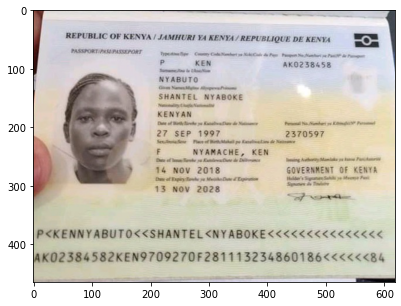

In [27]:
# read the image files
img  = cv2.imread('images/pass.9.jpg')

imgs = mpimg.imread('images/pass.9.jpg')
plt.figure(figsize = (15,5))
plt.imshow(imgs)
plt.show()

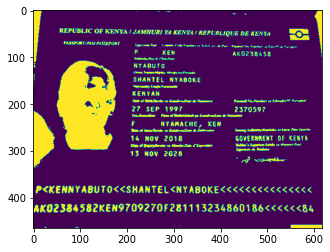

In [23]:
# convert to black and white 
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray,img_bin =cv2.threshold(gray,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)
plt.imshow(gray)

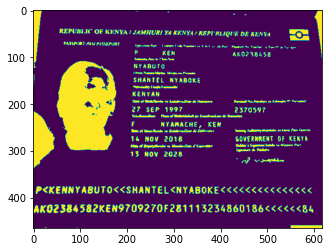

In [24]:
#Remove noise from the data
kernel = np.ones((2,1),np.uint8)
img = cv2.erode(gray,kernel,iterations = 1)
img = cv2.dilate(img,kernel,iterations =1)


plt.imshow(img)

In [28]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\lggat\AppData\Local\Tesseract-OCR\tesseract.exe'

returned_text  = pytesseract.image_to_string(img)
returned_text

' \n\nREPUBLIC OF KENYA / JAMHURI YA KENYA/ REPUBLIQUE DE KENYA = OS.\n\nSASSPORTIOMSEAESEPORT —Yptmtipe Camry linet Ca Pes tage Aen Ps eee\n\nce AKO238458\nNYABUTO\n\nne Nei gee\n\nSHANTEL NYABOKE\n\nNamen\n\nKENYAN\n\n(eee none dommes end ae Po\n27 SEP 1997 2370597\n\nSesame Mave hp Kain Nine\n\nF NYAMACHE, KEN\neee enter sesh yt Pt\n14 Nov 2018 GOVERNMENT OF KENYA\nDemat Rape rete we Mea De Tape eee rpmentt yn tocar tot\n13 Nov 2028 =\n\nPo\n\nP<KENNY ABUTO<<SHANTEL<NY ABOKE<<<<<<<<<<<KK<<\nAKO2384582KEN9709270F 281113234860186<<<<<<B4\n\x0c'

In [37]:
name = []
# clean the output 
added =[i for  i in returned_text.splitlines()  if (i != '' and i!=' ')]

# remove the name
for i in enumerate(added):
    if 'Name' in i[1]:
        name.append(i)
        
print('Name:',added[name[0][0]+1])

Name: KENYAN


In [33]:
added

['REPUBLIC OF KENYA / JAMHURI YA KENYA/ REPUBLIQUE DE KENYA = OS.',
 'SASSPORTIOMSEAESEPORT —Yptmtipe Camry linet Ca Pes tage Aen Ps eee',
 'ce AKO238458',
 'NYABUTO',
 'ne Nei gee',
 'SHANTEL NYABOKE',
 'Namen',
 'KENYAN',
 '(eee none dommes end ae Po',
 '27 SEP 1997 2370597',
 'Sesame Mave hp Kain Nine',
 'F NYAMACHE, KEN',
 'eee enter sesh yt Pt',
 '14 Nov 2018 GOVERNMENT OF KENYA',
 'Demat Rape rete we Mea De Tape eee rpmentt yn tocar tot',
 '13 Nov 2028 =',
 'Po',
 'P<KENNY ABUTO<<SHANTEL<NY ABOKE<<<<<<<<<<<KK<<',
 'AKO2384582KEN9709270F 281113234860186<<<<<<B4']

In [35]:
#Name
added[5]

'SHANTEL NYABOKE'

In [46]:
#Dob
dob = added[9][0:12]
dob

'27 SEP 1997 '

In [53]:
age = datetime.now().year - int(dob[-5:])
age

23

In [54]:
print('Name:',added[5])
print('DOB:',dob)
print('Age:', age)

Name: SHANTEL NYABOKE
DOB: 27 SEP 1997 
Age: 23


# Read the ID Card

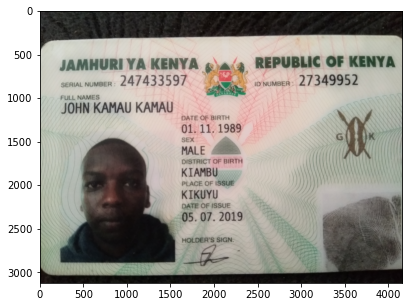

In [7]:
# read the image files
img1  = cv2.imread('images/id.1.jpg')


imgs = mpimg.imread('images/id.1.jpg')
plt.figure(figsize = (15,5))
plt.imshow(imgs)
plt.show()

In [8]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\lggat\AppData\Local\Tesseract-OCR\tesseract.exe'
returned_text  = pytesseract.image_to_string(img1)
returned_text

" \n\nJAMHURI YA KENYA «a2 REPUBLIC OF KENYA\n\nseria. numaer: 247433597 onumeen: 27 349952\n\n\\ oe > » s\nis ,\nSte At)\nc f fs ”\n= a = x G = - pe\n\nFULL NAMES\n\nJOHN KAMAU KAMAU\n\nDATE OF BIRTH\n\n01.11. 1989\nMALE 4\n\nDISTRICT OF BIRTH\n\nK LAMBU\n\nPLACE OF ISSUE\n\nKIKUYU\n\nDATE OF ISSUE\n\n05.07. 2019\n\n \n  \n  \n     \n   \n    \n\nHOLDER'S SIGN.\n\x0c"

In [9]:
added =[i for  i in returned_text.splitlines()  if (i != '' and i!=' ')]
added

['JAMHURI YA KENYA «a2 REPUBLIC OF KENYA',
 'seria. numaer: 247433597 onumeen: 27 349952',
 '\\ oe > » s',
 'is ,',
 'Ste At)',
 'c f fs ”',
 '= a = x G = - pe',
 'FULL NAMES',
 'JOHN KAMAU KAMAU',
 'DATE OF BIRTH',
 '01.11. 1989',
 'MALE 4',
 'DISTRICT OF BIRTH',
 'K LAMBU',
 'PLACE OF ISSUE',
 'KIKUYU',
 'DATE OF ISSUE',
 '05.07. 2019',
 '  ',
 '  ',
 '     ',
 '   ',
 '    ',
 "HOLDER'S SIGN."]

In [12]:
print('Name:',added[8])
print('DOB:',added[10])

Name: JOHN KAMAU KAMAU
DOB: 01.11. 1989


In [17]:
date = added[10]
age = datetime.now().year - int(date[-4:])

In [18]:
print('Name:',added[8])
print('DOB:',added[10])
print('Age:', age)

Name: JOHN KAMAU KAMAU
DOB: 01.11. 1989
Age: 31
